<h1><center>Asset Pricing - Practical Work</center></h1>
<h3><center>Masters in Financial Economics, Hilary Term 2022 <br>
            Saïd Business School, University of Oxford</center></h3>
<h4><center>Practical Work numbers :<br>20919<br>20907<br>20873<br>20883</center><h4>


<h4><center>Problem 1</center><h4>

In [5]:
# Import libraries we will use

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib as plt
import openpyxl as opl
import statistics as st
import scipy as sp

# Read data

portfolio = pd.read_excel('Problem2/data/25_Portfolios_5x5.xlsx', nrows= 1146, skiprows = 15, index_col = 0, parse_dates= True)

portfolio = pd.DataFrame(portfolio)
portfolio.index.names = ['DATE']

# Change date into correct format

portfolio.index.astype(int)
portfolio.index // 100
portfolio.index %100

dates = []
for value in portfolio.index:
    year = value // 100
    month = value % 100
    dates.append(pd.Timestamp(year=year, month=month, day=1))
portfolio.index = dates

# Compute monthly average returns and create table
p_return = pd.DataFrame()
p_return['SUM'] = round(portfolio.mean(axis = 0),2)

p_return_table = pd.DataFrame()
for i in range(0,21,5):
    p_return_row = p_return.iloc[i:i+5].T
    p_return_table = pd.concat([p_return_table, p_return_row])

for i in range(0,5):
    p_return_table.iloc[i,0:5] = p_return_table.iloc[i,5*i:5*(i+1)]

p_return_table = p_return_table.iloc[:,:5]
p_return_table.columns = ['LoBM', 'BM2', 'BM3', 'BM4', 'HiBM']
p_return_table.index = ['SMALL', 'ME2', 'ME3', 'ME4', 'BIG']
p_return_table

,LoBM,BM2,BM3,BM4,HiBM
SMALL,0.76,1.24,1.20,1.39,1.51
ME2,0.97,1.21,1.26,1.28,1.41
ME3,0.97,1.20,1.14,1.27,1.38
ME4,1.07,1.05,1.10,1.22,1.25
BIG,0.96,0.94,0.97,0.89,1.05


In [7]:
# Compute monthly beta returns and create table

Three_Factors = pd.read_excel('Problem2/data/F-F_Research_Data_Factors.xlsx', skiprows= 3, index_col=0)
mkt_return = pd.DataFrame()
mkt_return['SUM'] = Three_Factors['Mkt-RF'] + Three_Factors['RF']

beta = []
for i in portfolio.columns:
    cov_returns_i = np.cov(portfolio[i], mkt_return['SUM'])
    cov_returns_i = pd.DataFrame(cov_returns_i)
    beta_i = round(cov_returns_i.iloc[0,1]/cov_returns_i.iloc[1,1],2)
    beta.append(beta_i)

beta = pd.DataFrame(beta)

beta_table = pd.DataFrame()
for i in range(0,21,5):
    beta_row = beta.iloc[i:i+5].T
    beta_table = pd.concat([beta_table, beta_row])

for i in range(0,5):
    beta_table.iloc[i,0:5] = beta_table.iloc[i,5*i:5*(i+1)]

beta_table = beta_table.iloc[:,:5]
beta_table.columns = ['LoBM', 'BM2', 'BM3', 'BM4', 'HiBM']
beta_table.index = ['SMALL', 'ME2', 'ME3', 'ME4', 'BIG']
beta_table

,LoBM,BM2,BM3,BM4,HiBM
SMALL,1.43,1.24,1.12,1.05,1.08
ME2,1.39,1.18,1.08,1.03,1.16
ME3,1.32,1.13,1.01,1.00,1.09
ME4,1.21,1.08,1.02,1.00,1.10
BIG,0.98,0.93,0.86,0.90,0.99


In [9]:
# Compute portfolio standard deviation

stdev = []
for i in portfolio.columns:
    stdev_returns_i = round(np.sqrt(st.variance(portfolio[i])),2)
    stdev.append(stdev_returns_i)

stdev = pd.DataFrame(stdev)

stdev_table = pd.DataFrame()
for i in range(0,5):
    stdev_row = stdev.iloc[5*i:5*(i+1)].T
    stdev_table = pd.concat([stdev_table, stdev_row])

for i in range(0,5):
    stdev_table.iloc[i,0:5] = stdev_table.iloc[i,5*i:5*(i+1)]

stdev_table = stdev_table.iloc[:,:5]
stdev_table.columns = ['LoBM', 'BM2', 'BM3', 'BM4', 'HiBM']
stdev_table.index = ['SMALL', 'ME2', 'ME3', 'ME4', 'BIG']
stdev_table

,LoBM,BM2,BM3,BM4,HiBM
SMALL,7.96,6.97,6.05,5.84,6.30
ME2,7.16,6.04,5.52,5.36,6.22
ME3,6.56,5.51,5.03,5.10,5.86
ME4,5.83,5.13,4.97,5.04,5.81
BIG,4.62,4.40,4.31,4.75,5.64


In [11]:
# Compute portfolios Sharpe Ratio

risk_free = pd.read_excel('Problem2/data/RF_Data.xlsx', nrows= 1146, skiprows = 0, index_col = 0, parse_dates= True)
avg_risk_free = risk_free['RF'].mean()

avg_returns = []
for i in portfolio.columns:
    avg_returns_i = round(np.mean(portfolio[i]),2)
    avg_returns.append(avg_returns_i)

avg_returns = pd.DataFrame(avg_returns)

avg_returns_table = pd.DataFrame()
for i in range(0,5):
    avg_returns_row = avg_returns.iloc[5*i:5*(i+1)].T
    avg_returns_table = pd.concat([avg_returns_table, avg_returns_row])

for i in range(0,5):
    avg_returns_table.iloc[i,0:5] = avg_returns_table.iloc[i,5*i:5*(i+1)]

avg_returns_table = avg_returns_table.iloc[:,:5]
avg_returns_table.columns = ['LoBM', 'BM2', 'BM3', 'BM4', 'HiBM']
avg_returns_table.index = ['SMALL', 'ME2', 'ME3', 'ME4', 'BIG']
avg_returns_table

,LoBM,BM2,BM3,BM4,HiBM
SMALL,0.76,1.24,1.20,1.39,1.51
ME2,0.97,1.21,1.26,1.28,1.41
ME3,0.97,1.20,1.14,1.27,1.38
ME4,1.07,1.05,1.10,1.22,1.25
BIG,0.96,0.94,0.97,0.89,1.05


In [12]:
sharpe_ratio = []
for i in range(0,5):
    for j in range(0,5):
        sharpe_ratio_ij = round((avg_returns_table.iloc[i,j] - avg_risk_free)/stdev_table.iloc[i,j],2)
        sharpe_ratio.append(sharpe_ratio_ij)
    
sharpe_ratio = pd.DataFrame(sharpe_ratio)

sharpe_ratio_table = pd.DataFrame()
for i in range(0,5):
    sharpe_ratio_row = sharpe_ratio.iloc[5*i:5*(i+1)].T
    sharpe_ratio_table = pd.concat([sharpe_ratio_table, sharpe_ratio_row])

for i in range(0,5):
    sharpe_ratio_table.iloc[i,0:5] = sharpe_ratio_table.iloc[i,5*i:5*(i+1)]

sharpe_ratio_table = sharpe_ratio_table.iloc[:,:5]
sharpe_ratio_table.columns = ['LoBM', 'BM2', 'BM3', 'BM4', 'HiBM']
sharpe_ratio_table.index = ['SMALL', 'ME2', 'ME3', 'ME4', 'BIG']
sharpe_ratio_table

,LoBM,BM2,BM3,BM4,HiBM
SMALL,0.05,0.12,0.14,0.17,0.18
ME2,0.08,0.14,0.16,0.17,0.17
ME3,0.09,0.15,0.15,0.18,0.17
ME4,0.12,0.13,0.15,0.17,0.15
BIG,0.13,0.13,0.14,0.11,0.12


In [19]:
# Compute t-stats for each portfolio

true_mean = 0
t_statistic = []
for i in range(0,5):
    for j in range(0,5):
        t_ij = round((avg_returns_table.iloc[i,j] - true_mean)/(stdev_table.iloc[i,j]/np.sqrt(len(portfolio['SMALL LoBM']))),2)
        t_statistic.append(t_ij)

t_statistic = pd.DataFrame(t_statistic)

t_statistic_table = pd.DataFrame()
for i in range(0,5):
    t_statistic_row = t_statistic.iloc[5*i:5*(i+1)].T
    t_statistic_table = pd.concat([t_statistic_table, t_statistic_row])

for i in range(0,5):
    t_statistic_table.iloc[i,0:5] = t_statistic_table.iloc[i,5*i:5*(i+1)]

t_statistic_table = t_statistic_table.iloc[:,:5]
t_statistic_table.columns = ['LoBM', 'BM2', 'BM3', 'BM4', 'HiBM']
t_statistic_table.index = ['SMALL', 'ME2', 'ME3', 'ME4', 'BIG']
t_statistic_table

,LoBM,BM2,BM3,BM4,HiBM
SMALL,2.52,4.69,5.23,6.28,6.32
ME2,3.57,5.29,6.02,6.30,5.98
ME3,3.90,5.75,5.98,6.57,6.21
ME4,4.84,5.40,5.84,6.39,5.68
BIG,5.48,5.64,5.94,4.94,4.91


In [20]:
ret_BM5_1_ME5 = portfolio["BIG HiBM"] - portfolio["BIG LoBM"]
ret_BM5_1_ME4 = portfolio["ME4 BM5"] - portfolio["ME4 BM1"]
ret_BM5_1_ME3 = portfolio["ME3 BM5"] - portfolio["ME3 BM1"]
ret_BM5_1_ME2 = portfolio["ME2 BM5"] - portfolio["ME2 BM1"]
ret_BM5_1_ME1 = portfolio["SMALL HiBM"] - portfolio["SMALL LoBM"]

a1 = sp.stats.ttest_1samp(ret_BM5_1_ME1, 0).statistic
a2 = sp.stats.ttest_1samp(ret_BM5_1_ME2, 0).statistic
a3 = sp.stats.ttest_1samp(ret_BM5_1_ME3, 0).statistic
a4 = sp.stats.ttest_1samp(ret_BM5_1_ME4, 0).statistic
a5 = sp.stats.ttest_1samp(ret_BM5_1_ME5, 0).statistic

list_1 =[a1,a2,a3,a4,a5,'na']

ret_ME5_1_BM1 = portfolio["BIG LoBM"] - portfolio["SMALL LoBM"]
ret_ME5_1_BM2 = portfolio["ME5 BM2"] - portfolio["ME1 BM2"]
ret_ME5_1_BM3 = portfolio["ME5 BM3"] - portfolio["ME1 BM3"]
ret_ME5_1_BM4 = portfolio["ME5 BM4"] - portfolio["ME1 BM4"]
ret_ME5_1_BM5 = portfolio["BIG HiBM"] - portfolio["SMALL HiBM"]

b1 = sp.stats.ttest_1samp(ret_ME5_1_BM1, 0).statistic
b2 = sp.stats.ttest_1samp(ret_ME5_1_BM2, 0).statistic
b3 = sp.stats.ttest_1samp(ret_ME5_1_BM3, 0).statistic
b4 = sp.stats.ttest_1samp(ret_ME5_1_BM4, 0).statistic
b5 = sp.stats.ttest_1samp(ret_ME5_1_BM5, 0).statistic

list_2 =[b1,b2,b3,b4,b5]

t_statistic_table_new = pd.DataFrame([list_2], columns = list(t_statistic_table.columns), index = ["ME5-ME1"])
t_statistic_table = t_statistic_table.append(t_statistic_table_new)

t_statistic_table['BM5 - BM1'] = list_1
t_statistic_table

,LoBM,BM2,BM3,BM4,HiBM,BM5 - BM1
SMALL,2.520000,4.690000,5.230000,6.280000,6.320,4.658033
ME2,3.570000,5.290000,6.020000,6.300000,5.980,2.844487
ME3,3.900000,5.750000,5.980000,6.570000,6.210,2.532875
ME4,4.840000,5.400000,5.840000,6.390000,5.680,1.153603
BIG,5.480000,5.640000,5.940000,4.940000,4.910,0.548642
ME5-ME1,0.903951,-1.503945,-1.344316,-2.962681,-2.481,na


<h4><center>Problem 2</center><h4>

In [23]:
# Read datasetw we will use
# This is perhaps a bit repetitive, but it allows us to keep track of the datasets
#   used in this Problem vs Problem 1

portfolio = pd.read_excel('Problem2/data/25_Portfolios_5x5.xlsx', nrows= 1146, skiprows = 15, index_col = 0, parse_dates= True)
Mom = pd.read_excel('Problem2/data/F-F_Momentum_Factor.xlsx', skiprows = 13, index_col=0, usecols='A:B')
Five_Factors = pd.read_excel('Problem2/data/F-F_Research_Data_5_Factors_2x3.xlsx', skiprows = 3, index_col= 0)
Three_Factors = pd.read_excel('Problem2/data/F-F_Research_Data_Factors.xlsx', skiprows= 3, index_col=0)
ST_Reversal = pd.read_excel('Problem2/data/F-F_ST_Reversal_Factor.xlsx', skiprows = 13, index_col=0, usecols='A:B')

# Format dates

portfolio.index.astype(int)
portfolio.index // 100
portfolio.index % 100

dates = []
for value in portfolio.index:
    year = value // 100
    month = value % 100
    dates.append(pd.Timestamp(year=year, month=month, day=1))
portfolio.index = dates

Mom.index.astype(int)
Mom.index // 100
Mom.index %100

dates = []
for value in Mom.index:
    year = value // 100
    month = value % 100
    dates.append(pd.Timestamp(year=year, month=month, day=1))
Mom.index = dates

Five_Factors.index.astype(int)
Five_Factors.index // 100
Five_Factors.index %100

dates = []
for value in Five_Factors.index:
    year = value // 100
    month = value % 100
    dates.append(pd.Timestamp(year=year, month=month, day=1))
Five_Factors.index = dates

Three_Factors.index.astype(int)
Three_Factors.index // 100
Three_Factors.index %100

dates = []
for value in Three_Factors.index:
    year = value // 100
    month = value % 100
    dates.append(pd.Timestamp(year=year, month=month, day=1))
Three_Factors.index = dates

ST_Reversal.index.astype(int)
ST_Reversal.index // 100
ST_Reversal.index %100

dates = []
for value in ST_Reversal.index:
    year = value // 100
    month = value % 100
    dates.append(pd.Timestamp(year=year, month=month, day=1))
ST_Reversal.index = dates

##### Create DataFrame for regressions
##### 5 factor model:
\begin{equation*}
R_{i,t} - R_f = \alpha + \beta_1(R_{m,t} - R_f) + \beta_2SMB_t + \beta_3HML_t + \beta_4RMW_t + \beta_5CMA_t + \varepsilon_t
\end{equation*}

In [24]:
risk_free = Five_Factors['RF']
Five_Factors_w_constant = sm.add_constant(Five_Factors)
Five_Factors_w_constant = Five_Factors_w_constant.iloc[:,:-1]

port_excess_r = []
for column in portfolio:
    portfolio_new = portfolio[column] - risk_free
    port_excess_r.append(portfolio_new)

port_excess_r = pd.DataFrame(port_excess_r)
port_excess_r = port_excess_r.T
col_names = [(portfolio.columns)]
port_excess_r.columns = ['SMALL LoBM', 'ME1 BM2', 'ME1 BM3', 'ME1 BM4', 'SMALL HiBM', 'ME2 BM1', 'ME2 BM2', 'ME2 BM3', 'ME2 BM4', 'ME2 BM5', 'ME3 BM1', 'ME3 BM2', 'ME3 BM3', 'ME3 BM4', 'ME3 BM5', 'ME4 BM1', 'ME4 BM2', 'ME4 BM3', 'ME4 BM4', 'ME4 BM5', 'BIG LoBM', 'ME5 BM2', 'ME5 BM3', 'ME5 BM4','BIG HiBM']
port_excess_r


,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
1963-07-01,1.4388,-0.4352,0.1910,-0.2734,-1.4885,-2.6285,-0.0801,-1.2237,-2.2285,-1.5168,...,-1.2506,-1.7214,-2.1884,-1.8595,-2.1267,-0.1153,0.1653,0.9857,-0.6990,-1.3726
1963-08-01,4.5361,1.2629,1.0807,2.0003,4.5524,4.9361,4.2691,4.2771,4.5149,7.6114,...,5.1759,4.4410,5.9832,7.4888,5.0969,5.5191,3.9711,4.4987,7.8919,6.1324
1963-09-01,-3.2662,0.3702,-1.1541,-1.7954,-0.7153,-4.2886,-1.7734,-1.2215,-1.6204,-3.1048,...,-3.0674,-2.4285,-2.0500,-4.3365,-2.2643,-1.6295,-1.0185,-1.2552,-0.4605,-3.7663
1963-10-01,0.7174,-0.8904,0.8338,-0.0973,2.1297,1.1228,3.9442,2.1278,1.8055,3.5733,...,-0.6802,0.3973,2.3329,4.5088,0.3213,5.0439,1.4528,-0.5729,2.1250,0.1957
1963-11-01,-3.8678,-4.3345,-1.8748,-1.2972,-1.3898,-4.3869,-2.0234,-1.0496,-0.4243,-0.3910,...,-1.1498,-0.9488,-1.0633,1.3499,3.2688,-1.5256,0.7268,-1.8242,-2.4022,1.0755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-01,9.0335,5.9056,10.4974,11.4966,-3.1854,3.9416,8.8313,9.0869,11.6624,9.3689,...,3.4750,5.3391,9.1333,12.2373,12.6722,-0.6013,3.2736,6.7689,8.3882,14.3221
2021-03-01,-5.0924,1.1965,2.0749,6.1428,11.5952,-5.2298,-0.8036,2.3836,4.7201,7.5352,...,-1.9502,4.1918,3.8556,5.3175,6.5577,1.8242,4.9932,5.9902,7.3866,6.1788
2021-04-01,-3.1918,-2.5146,1.6436,1.0073,-0.9711,3.5662,1.6463,2.2390,0.7952,1.2227,...,4.3807,3.1023,5.9322,3.3530,6.0459,5.8966,5.8241,3.9870,4.7821,4.5701
2021-05-01,1.4358,0.5285,0.7486,2.3463,10.4483,-2.4340,0.1611,0.5692,2.6063,7.3152,...,-1.9889,0.0367,2.1225,3.7037,4.4815,-1.3830,0.7609,3.3797,3.6626,8.0384


In [25]:
# OLS "Kitchen sink" model (5F)

params_1 = []
rsquared_1 = []
pvalues_1 = []
resid_1 = pd.DataFrame()
for i in port_excess_r.columns:
    res = sm.OLS(port_excess_r[i], Five_Factors_w_constant).fit()
    params_1.append(round(res.params,2))
    rsquared_1.append(round(res.rsquared,2))
    pvalues_1.append(round(res.pvalues,2))
    resid_1[f'res {i}'] = res.resid
    
rsquared_1 = pd.DataFrame(rsquared_1)
params_1 = pd.DataFrame(params_1)
pvalues_1 = pd.DataFrame(pvalues_1)

for i in Five_Factors_w_constant.columns:
    params_1[f'p-val {i}'] = pvalues_1[i]

params_1['R2'] = rsquared_1
params_1.index = portfolio.columns
params_1

,const,Mkt-RF,SMB,HML,RMW,CMA,p-val const,p-val Mkt-RF,p-val SMB,p-val HML,p-val RMW,p-val CMA,R2
SMALL LoBM,-0.26,1.05,1.26,-0.41,-0.50,-0.13,0.00,0.0,0.0,0.00,0.00,0.03,0.93
ME1 BM2,0.16,0.94,1.22,-0.18,-0.39,0.04,0.02,0.0,0.0,0.00,0.00,0.46,0.94
ME1 BM3,-0.00,0.93,1.07,0.13,-0.05,0.03,0.93,0.0,0.0,0.00,0.02,0.42,0.96
ME1 BM4,0.16,0.89,1.07,0.29,-0.04,0.06,0.00,0.0,0.0,0.00,0.11,0.11,0.95
SMALL HiBM,0.13,0.97,1.10,0.41,0.01,0.26,0.10,0.0,0.0,0.00,0.76,0.00,0.91
ME2 BM1,-0.08,1.10,0.98,-0.44,-0.17,-0.15,0.20,0.0,0.0,0.00,0.00,0.00,0.96
ME2 BM2,0.00,1.01,0.94,-0.03,0.08,0.02,0.92,0.0,0.0,0.17,0.00,0.52,0.95
ME2 BM3,-0.01,0.98,0.81,0.27,0.22,-0.00,0.88,0.0,0.0,0.00,0.00,0.99,0.94
ME2 BM4,0.02,0.96,0.75,0.42,0.09,0.07,0.73,0.0,0.0,0.00,0.00,0.03,0.95
ME2 BM5,0.00,1.08,0.89,0.62,0.04,0.04,0.98,0.0,0.0,0.00,0.11,0.26,0.95


In [27]:
# Regression: 3 factors + Momentum

Three_Factors_w_constant = sm.add_constant(Three_Factors)
Three_Factors_w_constant.insert(4, 'Mom', Mom)
Three_Factors_w_Mom = Three_Factors_w_constant
Three_Factors_w_Mom = Three_Factors_w_constant.iloc[:,:-1]

params_2 = []
rsquared_2 = []
pvalues_2 = []
resid_2 = pd.DataFrame()
for i in port_excess_r.columns:
    res = sm.OLS(port_excess_r[i], Three_Factors_w_Mom).fit()
    params_2.append(round(res.params,2))
    rsquared_2.append(round(res.rsquared,2))
    pvalues_2.append(round(res.pvalues,2))
    resid_2[f'res {i}'] = res.resid
    
rsquared_2 = pd.DataFrame(rsquared_2)
params_2 = pd.DataFrame(params_2)
pvalues_2 = pd.DataFrame(pvalues_2)

for i in Three_Factors_w_Mom.columns:
    params_2[f'p-val {i}'] = pvalues_2[i]

params_2['R2'] = rsquared_2
params_2.index = portfolio.columns
params_2

,const,Mkt-RF,SMB,HML,Mom,p-val const,p-val Mkt-RF,p-val SMB,p-val HML,p-val Mom,R2
SMALL LoBM,-0.42,1.09,1.38,-0.30,-0.07,0.00,0.0,0.0,0.00,0.00,0.91
ME1 BM2,0.01,0.97,1.32,0.02,0.01,0.91,0.0,0.0,0.38,0.41,0.93
ME1 BM3,-0.01,0.93,1.09,0.30,-0.03,0.80,0.0,0.0,0.00,0.04,0.95
ME1 BM4,0.13,0.90,1.08,0.49,0.02,0.02,0.0,0.0,0.00,0.10,0.95
SMALL HiBM,0.17,0.95,1.11,0.69,-0.00,0.03,0.0,0.0,0.00,0.84,0.91
ME2 BM1,-0.13,1.13,1.01,-0.38,-0.06,0.04,0.0,0.0,0.00,0.00,0.95
ME2 BM2,0.05,1.01,0.90,0.11,-0.04,0.32,0.0,0.0,0.00,0.00,0.95
ME2 BM3,0.08,0.97,0.74,0.39,-0.03,0.17,0.0,0.0,0.00,0.02,0.93
ME2 BM4,0.05,0.95,0.73,0.57,0.00,0.35,0.0,0.0,0.00,0.78,0.95
ME2 BM5,0.01,1.09,0.88,0.78,0.00,0.90,0.0,0.0,0.00,0.89,0.95


In [28]:
# Regressions: 3 factors + ST Reversal

Three_Factors_w_constant = sm.add_constant(Three_Factors)
Three_Factors_w_constant.insert(4, 'ST REV', ST_Reversal)
Three_Factors_w_ST = Three_Factors_w_constant
Three_Factors_w_ST = Three_Factors_w_constant.iloc[:,:-1]

params_3 = []
rsquared_3 = []
pvalues_3 = []
resid_3 = pd.DataFrame()
for i in port_excess_r.columns:
    res = sm.OLS(port_excess_r[i], Three_Factors_w_ST).fit()
    params_3.append(round(res.params,2))
    rsquared_3.append(round(res.rsquared,2))
    pvalues_3.append(round(res.pvalues,2))
    resid_3[f'res {i}'] = res.resid
    
rsquared_3 = pd.DataFrame(rsquared_3)
params_3 = pd.DataFrame(params_3)
pvalues_3 = pd.DataFrame(pvalues_3)

for i in Three_Factors_w_ST.columns:
    params_3[f'p-val {i}'] = pvalues_3[i]

params_3['R2'] = rsquared_3
params_3.index = portfolio.columns
params_3

,const,Mkt-RF,SMB,HML,ST REV,p-val const,p-val Mkt-RF,p-val SMB,p-val HML,p-val ST REV,R2
SMALL LoBM,-0.49,1.10,1.38,-0.28,0.04,0.00,0.0,0.0,0.00,0.20,0.91
ME1 BM2,0.03,0.98,1.33,0.02,-0.04,0.66,0.0,0.0,0.38,0.14,0.93
ME1 BM3,-0.04,0.93,1.08,0.31,0.02,0.42,0.0,0.0,0.00,0.23,0.95
ME1 BM4,0.14,0.89,1.08,0.48,-0.00,0.00,0.0,0.0,0.00,0.82,0.95
SMALL HiBM,0.15,0.94,1.10,0.69,0.05,0.04,0.0,0.0,0.00,0.06,0.91
ME2 BM1,-0.19,1.13,1.00,-0.36,0.03,0.00,0.0,0.0,0.00,0.22,0.95
ME2 BM2,0.03,1.02,0.91,0.13,-0.03,0.59,0.0,0.0,0.00,0.12,0.95
ME2 BM3,0.04,0.97,0.74,0.40,0.03,0.46,0.0,0.0,0.00,0.08,0.93
ME2 BM4,0.05,0.96,0.73,0.57,-0.01,0.28,0.0,0.0,0.00,0.51,0.95
ME2 BM5,0.01,1.08,0.88,0.78,0.01,0.92,0.0,0.0,0.00,0.52,0.95


In [32]:
# GRS statistic and test
# Again, some parts may seem repetitive, but this allows us to keep close track of what is
#   being calculated at every step

# 5F
mean_F1_F5 = Five_Factors_w_constant["Mkt-RF"] - Five_Factors_w_constant["Mkt-RF"].mean(axis=0)
mean_F2_F5 = Five_Factors_w_constant["SMB"] - Five_Factors_w_constant["SMB"].mean(axis=0)
mean_F3_F5 = Five_Factors_w_constant["HML"] - Five_Factors_w_constant["HML"].mean(axis=0)
mean_F4_F5 = Five_Factors_w_constant["RMW"] - Five_Factors_w_constant["RMW"].mean(axis=0)
mean_F5_F5 = Five_Factors_w_constant["CMA"] - Five_Factors_w_constant["CMA"].mean(axis=0)
F5_data_vector = [mean_F1_F5, mean_F2_F5, mean_F3_F5, mean_F4_F5, mean_F5_F5]

omega_hat_F5 = np.zeros((5,5))

for i in range(len(Five_Factors_w_constant)):
    F5_vector = np.array([mean_F1_F5[i], mean_F2_F5[i], mean_F3_F5[i], mean_F4_F5[i], mean_F5_F5[i]])
    omega_hat_F5 = omega_hat_F5 + np.outer(F5_vector,F5_vector)

factor_means1 = np.array([Five_Factors_w_constant["Mkt-RF"].mean(axis=0), Five_Factors_w_constant["SMB"].mean(axis=0), Five_Factors_w_constant["HML"].mean(axis=0), Five_Factors_w_constant["RMW"].mean(axis=0), Five_Factors_w_constant["CMA"].mean(axis=0)])

alpha1 = params_1.iloc[:,0]
t= len(portfolio)
cov_res1 = np.linalg.inv((resid_1.T @ resid_1)/t)
n = len(portfolio.columns)
k1 = (len(Five_Factors_w_constant.columns)-1)

# MOM

mean_F1_F3Mom = Three_Factors_w_Mom["Mkt-RF"] - Three_Factors_w_Mom["Mkt-RF"].mean(axis=0)##
mean_F2_F3Mom = Three_Factors_w_Mom["SMB"] - Three_Factors_w_Mom["SMB"].mean(axis=0)
mean_F3_F3Mom = Three_Factors_w_Mom["HML"] - Three_Factors_w_Mom["HML"].mean(axis=0)
mean_F4_F3Mom = Three_Factors_w_Mom["Mom"] - Three_Factors_w_Mom["Mom"].mean(axis=0)
F3_Mom_vector = [mean_F1_F3Mom, mean_F2_F3Mom, mean_F3_F3Mom, mean_F4_F3Mom]

omega_hat_Mom = np.zeros((4,4))

for i in range(len(Three_Factors_w_Mom)):
    F3_Mom_vector = np.array([mean_F1_F3Mom[i], mean_F2_F3Mom[i], mean_F3_F3Mom[i], mean_F4_F3Mom[i]])
    omega_hat_Mom = omega_hat_Mom + np.outer(F3_Mom_vector,F3_Mom_vector)

factor_means2 = np.array([Three_Factors_w_Mom["Mkt-RF"].mean(axis=0), Three_Factors_w_Mom["SMB"].mean(axis=0), Three_Factors_w_Mom["HML"].mean(axis=0), Three_Factors_w_Mom["Mom"].mean(axis=0)])
alpha2 = params_2.iloc[:,0]
t = len(portfolio)
cov_res2 = np.linalg.inv((resid_2.T @ resid_2)/t)
n = len(portfolio.columns)
k2 = (len(Three_Factors_w_Mom.columns)-1)


# ST

mean_F1_F3ST = Three_Factors_w_ST["Mkt-RF"] - Three_Factors_w_ST["Mkt-RF"].mean(axis=0)
mean_F2_F3ST = Three_Factors_w_ST["SMB"] - Three_Factors_w_ST["SMB"].mean(axis=0)
mean_F3_F3ST = Three_Factors_w_ST["HML"] - Three_Factors_w_ST["HML"].mean(axis=0)
mean_F4_F3ST = Three_Factors_w_ST["ST REV"] - Three_Factors_w_ST["ST REV"].mean(axis=0)

omega_hat_ST = np.zeros((4,4))

for i in range(len(Three_Factors_w_ST)):
    F3_ST_vector = np.array([mean_F1_F3ST[i], mean_F2_F3ST[i], mean_F3_F3ST[i], mean_F4_F3ST[i]])
    omega_hat_ST = omega_hat_ST + np.outer(F3_ST_vector,F3_ST_vector)

factor_means3 = np.array([Three_Factors_w_ST["Mkt-RF"].mean(axis=0), Three_Factors_w_ST["SMB"].mean(axis=0), Three_Factors_w_ST["HML"].mean(axis=0), Three_Factors_w_ST["ST REV"].mean(axis=0)])

alpha3 = params_3.iloc[:,0]
t = len(portfolio)
cov_res3 = np.linalg.inv((resid_3.T @ resid_3)/t)
k_ST = (len(Three_Factors_w_ST.columns)-1)
n = len(portfolio.columns)
k3 = (len(Three_Factors_w_ST.columns)-1)


def GRS_stat(Factor_model, f_means, omega_hat, alpha, k, cov_res):    
    omega_hat_inv = np.linalg.inv(omega_hat/len(Factor_model))
    GRS_function = ((t - n - k)/n)*(1/(1 + f_means.T @ omega_hat_inv @ f_means))*(alpha.T @ cov_res @ alpha)
    p_value = 1 - sp.stats.f.cdf(GRS_function, n, (t-n-k))
    return GRS_function, p_value

x = GRS_stat(Five_Factors_w_constant, factor_means1, omega_hat_F5, alpha1, k1, cov_res1)
y = GRS_stat(Three_Factors_w_Mom, factor_means2 , omega_hat_Mom, alpha2, k2, cov_res2)
z = GRS_stat(Three_Factors_w_ST, factor_means3, omega_hat_ST, alpha3, k3, cov_res3)

w = [x,y,z]
w = pd.DataFrame(w)
w.columns = ['GRS','p-Value']
w.index = ['5F','3F + Mom', '3F + ST']
w

,GRS,p-Value
5F,2.889847,4.176751e-06
3F + Mom,2.968347,2.249892e-06
3F + ST,3.775141,3.117700e-09


In [34]:
# Fama-MacBeth cross-sectional regression

params_1 = sm.add_constant(params_1)
params_2 = sm.add_constant(params_2)
params_3 = sm.add_constant(params_3)
params_1.iloc[:,1] = params_1.iloc[:,0]
params_2.iloc[:,1] = params_2.iloc[:,0]
params_3.iloc[:,1] = params_3.iloc[:,0]
params_cross_sectional = [params_1.iloc[:,1:7], params_2.iloc[:,1:6], params_3.iloc[:,1:6]]

x = port_excess_r.T

Five_Factors_ff = []
Three_Mom_ff = []
Three_ST_ff = []
coeff_ff = [Five_Factors_ff,Three_Mom_ff,Three_ST_ff]
for i in range(3):
    for column in x.columns:
        y = sm.OLS(x[column],params_cross_sectional[i]).fit()
        coeff_ff[i].append(y.params)

Five_Factors_ff = pd.DataFrame(Five_Factors_ff)
Three_Mom_ff = pd.DataFrame(Three_Mom_ff)
Three_ST_ff = pd.DataFrame(Three_ST_ff)
np.sum(Three_ST_ff['const'])

761.0906230504913

In [38]:
# Risk premia (lambda) and pricing error

coeff = [Five_Factors_ff, Three_Mom_ff, Three_ST_ff]
lamda_five_ff = []
lamda_three_mom = []
lamda_three_st = []
lamdas = [lamda_five_ff, lamda_three_mom, lamda_three_st]
for i in range(3):
    for column in coeff[i].columns:
        lamdas_j = np.mean(coeff[i][column])
        lamdas[i].append(lamdas_j)

lamda_five_ff = pd.DataFrame(lamda_five_ff)
lamda_three_mom = pd.DataFrame(lamda_three_mom)
lamda_three_st = pd.DataFrame(lamda_three_st)

lamda_five_ff.index = params_1.iloc[:,1:7].columns
lamda_five_ff.columns = ['Five Factors']

lamda_three_mom.index = params_2.iloc[:,1:6].columns
lamda_three_mom.columns = ['Three + Mom']

lamda_three_st.index = params_3.iloc[:,1:6].columns
lamda_three_st.columns = ['Three + ST']

lamda_five_ff#.iloc[2]

,Five Factors
const,0.801848
Mkt-RF,-0.236530
SMB,0.288837
HML,0.248173
RMW,0.356577
CMA,0.131942


In [42]:
# Compute t-statistic

t_stat_five_ff = []
for i in range(len(lamda_five_ff)):
    t_stat_i = lamda_five_ff.iloc[i]/(np.std(Five_Factors_ff.iloc[:,i])/np.sqrt(len(Five_Factors_ff))) 
    t_stat_five_ff.append(t_stat_i)

t_stat_three_mom = []
for i in range(len(lamda_three_mom)):
    t_stat_i = lamda_three_mom.iloc[i]/(np.std(Three_Mom_ff.iloc[:,i]/np.sqrt(len(Three_Mom_ff))))
    t_stat_three_mom.append(t_stat_i)

t_stat_three_st = []
for i in range(len(lamda_three_st)):
    t_stat_i = lamda_three_st.iloc[i]/(np.std(Three_ST_ff.iloc[:,i])/np.sqrt(len(Three_ST_ff)))
    t_stat_three_st.append(t_stat_i)

t_stat_five_ff = pd.DataFrame(t_stat_five_ff)
t_stat_three_mom = pd.DataFrame(t_stat_three_mom)
t_stat_three_st = pd.DataFrame(t_stat_three_st)

five_factors_final_table= pd.concat([lamda_five_ff, t_stat_five_ff], axis = 1)
five_factors_final_table.columns = ['lamda', 't-stat']

three_factor_and_mom_final_table= pd.concat([lamda_three_mom, t_stat_three_mom], axis = 1)
three_factor_and_mom_final_table.columns = ['lamda', 't-stat']

three_factor_and_ST_final_table= pd.concat([lamda_three_st, t_stat_three_st], axis = 1)
three_factor_and_ST_final_table.columns = ['lamda', 't-stat']

print(three_factor_and_ST_final_table)
print('\n')
print(five_factors_final_table)
print('\n')
print(three_factor_and_mom_final_table )

           lamda    t-stat
const   1.093521  4.131814
Mkt-RF -0.474521 -1.512999
SMB     0.174186  1.466443
HML     0.307032  2.731500
ST REV -0.946680 -1.997044


           lamda    t-stat
const   0.801848  2.970661
Mkt-RF -0.236530 -0.740976
SMB     0.288837  2.455903
HML     0.248173  2.200952
RMW     0.356577  2.100055
CMA     0.131942  0.821861


           lamda    t-stat
const   0.200456  0.667337
Mkt-RF  0.457491  1.311542
SMB     0.174967  1.472242
HML     0.331219  2.941091
Mom     2.883297  3.978572


<h4><center>Problem 3</center><h4>

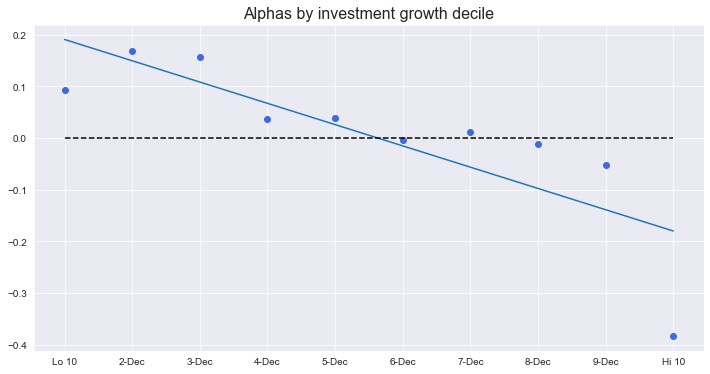

In [51]:
# Read data
portfolio = pd.read_csv('Problem1/data/25_Portfolios_5x5.csv', parse_dates= True, index_col='DATE', infer_datetime_format=True)
portfolio.index = pd.to_datetime(portfolio.index, format="%Y%m")

# Calculate average returns

inv_df = pd.read_csv('Problem3/Portfolios_Formed_on_INV.csv',  index_col = "DATE")
inv_df.index = pd.to_datetime(inv_df.index, format="%Y%m")

inv_df['RM'] = np.round((inv_df['Lo 30'] + inv_df['Med 40'] + inv_df['Hi 30'])/3,4)

risk_free = pd.read_csv('Problem1/data/RF_Data.csv', index_col = "DATE")
risk_free.index = pd.to_datetime(risk_free.index, format = "%Y%m")


# Merge together
df = pd.merge(left = inv_df, right = risk_free, how = "inner", on = "DATE")

# Excess returns (rewrite old variables for simplicity)
df["Lo 10"] = df["Lo 10"] - df["RF"]
df["2-Dec"] = df["2-Dec"] - df["RF"]
df["3-Dec"] = df["3-Dec"] - df["RF"]
df["4-Dec"] = df["4-Dec"] - df["RF"]
df["5-Dec"] = df["5-Dec"] - df["RF"]
df["6-Dec"] = df["6-Dec"] - df["RF"]
df["7-Dec"] = df["7-Dec"] - df["RF"]
df["8-Dec"] = df["8-Dec"] - df["RF"]
df["9-Dec"] = df["9-Dec"] - df["RF"]
df["Hi 10"] = df["Hi 10"] - df["RF"]
df["RM"] = df["RM"] - df["RF"]

# Regression dataset

reg_df = df[["RM","Lo 10", "2-Dec", "3-Dec", "4-Dec", "5-Dec", "6-Dec", "7-Dec", "8-Dec", "9-Dec", "Hi 10"]]


# Estimate CAPM regression for each investment decile
import statsmodels.api as sm

output_df = pd.DataFrame(columns = ["var","alpha", "beta"])

for i in reg_df.columns:
    if(i != 'RM'):
        factors = sm.add_constant(reg_df['RM'])
        mod = sm.OLS(reg_df[i], factors)
        res = mod.fit(cov_type="HC0") # Heteroskedasticity-robust errors
        aux_df = {"var": [i], "alpha": [res.params['const']], "beta": [res.params['RM']]}
        aux_df = pd.DataFrame(aux_df)
        output_df = output_df.append(aux_df)

# Plot results
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

fig = plt.figure(figsize=(12, 6))
fig = plt.plot(output_df['var'], output_df['alpha'], 'o',color = "royalblue")
output_df['seq'] = np.array([1,2,3,4,5,6,7,8,9,10])
m, b = np.polyfit(np.array(output_df['seq']), np.array(output_df['alpha']), 1) # Linear regression
output_df['line'] = m*output_df['seq'] + b
fig = plt.plot(output_df['var'], output_df['line'])
fig = plt.plot(np.repeat(0,10), linestyle = 'dashed', color = 'black')
fig = plt.title("Alphas by investment growth decile", size = 16)
fig = plt.savefig("alphas_by_investment_decile.jpg")
fig = plt.show()


In [54]:
# Define investment growth factor (IGF)

df['inv_factor'] = df['Lo 30'] - df['Hi 30']

# Calculate average market return

#portfolio['RM'] = portfolio.apply(np.mean, axis = 0) # Not necessary. Already in Fama-Frech data

factor_df = pd.read_csv("Problem3/F-F_Research_Data_Factors.csv", index_col = "DATE")
factor_df.index = pd.to_datetime(factor_df.index, format= "%Y%m")

# Subtract RF on all columns so that we have excess returns.
# Importantly, note that this is the original, unaltered dataset,
# not the one in which we had already substracted the risk-free rate.

factor_df_adj = pd.merge(left = portfolio, right = factor_df['RF'], on = 'DATE', how = 'inner')

for i in factor_df_adj:
    if(i != 'RF'):
        factor_df_adj[i] = factor_df_adj[i] - factor_df_adj['RF']


# Run 2 regressions for every portfolio.
# One with the investment factor, one without

factor_df_adj = pd.merge(left = factor_df_adj, right = factor_df[["RM", "SMB", "HML"]], on = 'DATE', how = 'inner')
factor_df_adj = pd.merge(left = factor_df_adj, right = df['inv_factor'], on = "DATE", how = "inner")

# Note that RM = Mkt-RF already
factors_ni = sm.add_constant(factor_df_adj[["RM","SMB","HML"]])
factors_i = sm.add_constant(factor_df_adj[["RM","SMB","HML","inv_factor"]])

# Auxilliary DataFrame where we will paste all of our regression outputs
df_outputs = pd.DataFrame(columns = ['portfolio','alpha_ni', 'rsq_ni','tstat_ni','rss_ni',
                                     'alpha_i', 'beta_i', 'rsq_i','tstat_i','rss_i'])

df_aux_reg = factor_df_adj.drop(['RF','SMB','HML','inv_factor','RM'], axis = 1)

# Residuals matrices
# For all the following variables:
# ni : No investment growth factor
# i : Using the investment growth factor

resid_ni = pd.DataFrame()
resid_i = pd.DataFrame()

for i in df_aux_reg.columns:
    mod_ni = sm.OLS(factor_df_adj[i], factors_ni)
    res_ni = mod_ni.fit(cov_type="HC0")
    mod_i = sm.OLS(factor_df_adj[i], factors_i)
    res_i = mod_i.fit(cov_type="HC0")
    beta_i = res_i.params.loc['inv_factor'].astype('float')
    resid_i[f'res {i}'] = res_i.resid
    resid_ni[f'res {i}'] = res_ni.resid
    aux_df = {'portfolio': [i],
                'alpha_ni' : np.round([res_ni.params.loc['const']],2),
                'rsq_ni' : np.round([res_ni.rsquared_adj],4), # Less rounding because we will compare it
                'tstat_ni' : np.round([res_ni.tvalues[0]],2),
                'rss_ni' : np.round([res_ni.ssr],2),
                'alpha_i' : np.round([res_i.params.loc['const']],2),
                'beta_i': np.round(beta_i,2),
                'rsq_i' : np.round([res_i.rsquared_adj],4), # Less rounding because we will compare it
                'tstat_i' : np.round([res_i.tvalues[0]],2),
                'rss_i' : np.round([res_i.ssr],2)}
    aux_df = pd.DataFrame(aux_df)
    df_outputs = df_outputs.append(aux_df)

# compare 
df_outputs['rsq_diff'] = df_outputs['rsq_i'] - df_outputs['rsq_ni']

print(df_outputs)


    portfolio  alpha_ni  rsq_ni  tstat_ni   rss_ni  alpha_i  beta_i   rsq_i  \
0  SMALL LoBM     -0.47  0.9099     -5.35  3968.57    -0.47   -0.06  0.9099   
0     ME1 BM2      0.02  0.9267      0.29  2472.52     0.02   -0.00  0.9266   
0     ME1 BM3     -0.03  0.9527     -0.69  1203.06    -0.03   -0.00  0.9526   
0     ME1 BM4      0.14  0.9501      2.83  1184.02     0.15   -0.03  0.9501   
0  SMALL HiBM      0.17  0.9075      2.59  2553.70     0.16    0.03  0.9074   
0     ME2 BM1     -0.18  0.9453     -2.79  1950.70    -0.19    0.03  0.9453   
0     ME2 BM2      0.02  0.9459      0.39  1371.80     0.01    0.10  0.9468   
0     ME2 BM3      0.05  0.9283      0.94  1518.81     0.04    0.07  0.9287   
0     ME2 BM4      0.05  0.9465      1.03  1065.23     0.04    0.06  0.9469   
0     ME2 BM5      0.01  0.9518      0.17  1293.34     0.01   -0.01  0.9518   
0     ME3 BM1     -0.10  0.9459     -1.68  1622.44    -0.09   -0.10  0.9466   
0     ME3 BM2      0.07  0.9211      1.21  1669.57  

In [55]:

# Sharpe ratio for GSR test
# This bit of code it taken from the GRS test we perform in Problem 2

# Mean of all the factors used
mean_SMB = factor_df_adj['SMB'] - factor_df_adj['SMB'].mean(axis = 0)
mean_HML = factor_df_adj['HML'] - factor_df_adj['HML'].mean(axis = 0)
mean_I = factor_df_adj['inv_factor'] - factor_df_adj['inv_factor'].mean(axis = 0)
mean_RM  = factor_df_adj['RM'] - factor_df_adj['RM'].mean(axis = 0)

matrix_ni = np.zeros((3,3))
matrix_i = np.zeros((4,4))

for i in range(len(factor_df_adj)):
    vector_ni = np.array( [mean_SMB[i], mean_HML[i], mean_RM[i]])
    matrix_ni = matrix_ni + np.outer(vector_ni, vector_ni)
    vector_i = np.array( [mean_SMB[i], mean_HML[i], mean_I[i], mean_RM[i]])
    matrix_i = matrix_i + np.outer(vector_i, vector_i)

# Invert the covariance matrices

omega_inv_ni = np.linalg.inv(matrix_ni/len(factor_df_adj))
omega_inv_i = np.linalg.inv(matrix_i/len(factor_df_adj))

factor_means_ni = np.array([factor_df_adj['SMB'].mean(axis = 0), factor_df_adj['HML'].mean(axis = 0),
                            factor_df_adj['RM'].mean(axis = 0)])
factor_means_i = np.array([factor_df_adj['SMB'].mean(axis = 0), factor_df_adj['HML'].mean(axis = 0),
                            factor_df_adj['inv_factor'].mean(axis = 0), factor_df_adj['RM'].mean(axis = 0)])
t = len(factor_df_adj)
n = 25 # number of assets (i.e. portfolios)
k_ni = 3 # number of factors
k_i = 4 # number of factors
alpha_ni = df_outputs["alpha_ni"]
alpha_i = df_outputs["alpha_i"]

covariance_resid_i = np.linalg.inv((resid_i.T @ resid_i)/t)
covariance_resid_ni = np.linalg.inv((resid_ni.T @ resid_ni)/t)

GRS_stat_i = ((t - n - k_i)/n)*(1/(1 + factor_means_i.T @ omega_inv_i @ factor_means_i))*(alpha_i.T @ covariance_resid_i @ alpha_i)
GRS_stat_ni = ((t - n - k_i)/n)*(1/(1 + factor_means_ni.T @ omega_inv_ni @ factor_means_ni))*(alpha_ni.T @ covariance_resid_ni @ alpha_ni)
p_value_i = 1 - sp.stats.f.cdf(GRS_stat_i, n, t - n - k_i)
p_value_ni = 1 - sp.stats.f.cdf(GRS_stat_ni, n, t - n - k_ni)
print(f"GRS stat without investment growth factor: {np.round(GRS_stat_ni,2)} ; p-value: {np.round(p_value_ni,2)}")
print(f"GRS stat with investment growth factor: {np.round(GRS_stat_i,2)} ; p-value: {np.round(p_value_i,2)}")


GRS stat without investment growth factor: 3.52 ; p-value: 0.0
GRS stat with investment growth factor: 3.74 ; p-value: 0.0
